# Analyzing Crime in LA

In [26]:
import pandas as pd
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
crimes1 = pd.read_csv("/Users/batmachine/Documents/Analyzing_Crime_in_LA-main/Crime_Data_from_2010_to_2019.csv")
crimes2 = pd.read_csv("/Users/batmachine/Documents/Analyzing_Crime_in_LA-main/Crime_Data_from_2020_to_Present.csv")
crimes1.rename(columns={'AREA ': 'AREA'}, inplace=True)
crimes = pd.concat([crimes1, crimes2])
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [27]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040968 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8), int

# Explanatory Data Analysis

In [28]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Importing Packages
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [30]:
# Change to dateformat
date_time= ['Date Rptd', 'DATE OCC']
for i in date_time:
    crimes[i]=pd.to_datetime(crimes[i])

In [31]:
#Remove data from 2013-2023
crimes_filtered = crimes[~crimes['DATE OCC'].dt.year.isin([2010, 2011, 2012, 2024])]

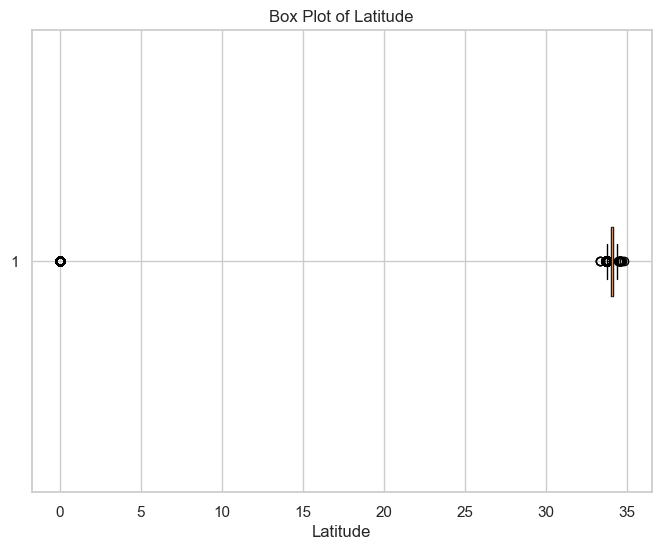

In [32]:
# Create a horizontal box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(crimes_filtered['LAT'], vert=False)  
plt.title('Box Plot of Latitude')
plt.xlabel('Latitude')
plt.show()

In [33]:
#Remove outliers
mean_latitude = crimes_filtered['LAT'].mean()

# Replace the latitude value of 0 with the mean latitude
crimes_filtered['LAT'] = crimes_filtered['LAT'].replace(0, mean_latitude)

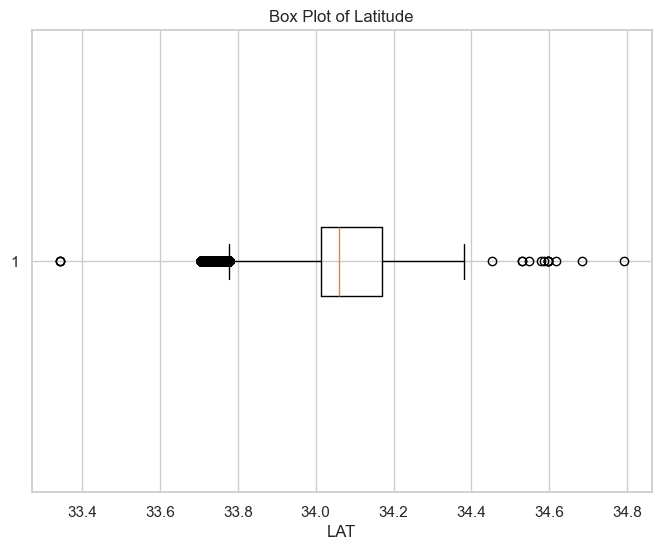

In [34]:
# Create a horizontal box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(crimes_filtered['LAT'], vert=False)  
plt.title('Box Plot of Latitude')
plt.xlabel('LAT')
plt.show()

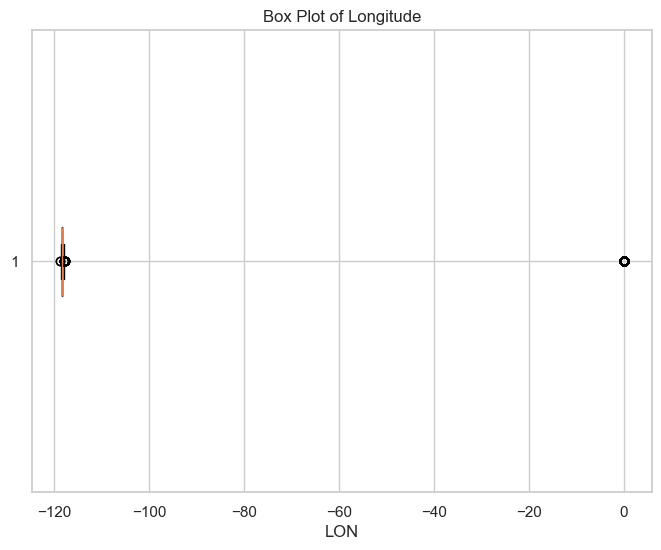

In [35]:
# Create a horizontal box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(crimes_filtered['LON'], vert=False)
plt.title('Box Plot of Longitude')
plt.xlabel('LON')
plt.show()

In [36]:
mean_longitude = crimes_filtered['LON'].mean()

# Replace the latitude value of 0 with the mean longitude
crimes_filtered['LON'] = crimes_filtered['LON'].replace(0, mean_longitude)

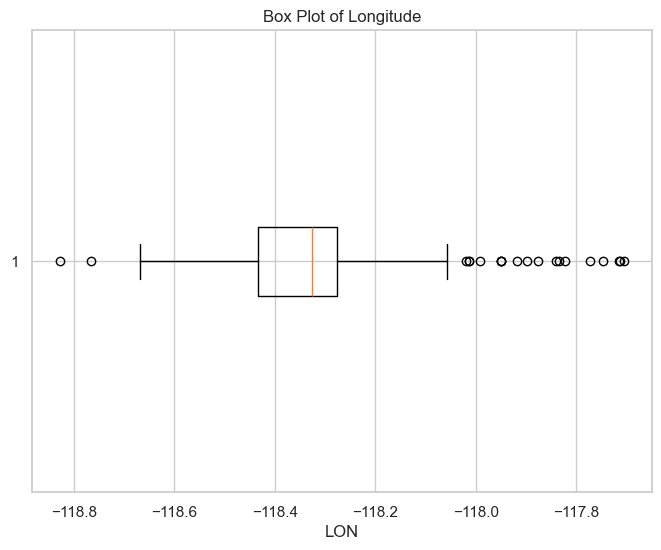

In [37]:
# Create a horizontal box plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(crimes_filtered['LON'], vert=False)  
plt.title('Box Plot of Longitude')
plt.xlabel('LON')
plt.show()

In [38]:
def null_analysis(df):
    # Count of null values for each column
    null_count = df.isna().sum()

    # Ratio of null values to the total length for each column
    null_ratio = null_count / len(df)

    # Creating the result dataframe
    result = pd.DataFrame({
        'Column Name': null_count.index,
        'Null Values Count': null_count.values,
        'Null Ratio': null_ratio.values.round(3)
    })

    return result
null_analysis(crimes_filtered)

,Column Name,Null Values Count,Null Ratio
0,DR_NO,0,0.000
1,Date Rptd,0,0.000
2,DATE OCC,0,0.000
3,TIME OCC,0,0.000
4,AREA,0,0.000
5,AREA NAME,0,0.000
6,Rpt Dist No,0,0.000
7,Part 1-2,0,0.000
8,Crm Cd,0,0.000
9,Crm Cd Desc,0,0.000


## Handle missing values

In [39]:
# Drop rows where 'Premis Cd' & 'Crm Cd 1' is NaN
crimes_filtered.dropna(subset=['Premis Cd', 'Crm Cd 1', 'Status'], inplace=True)

# Recreating the dictionary for imputation
impute_values = {
    'Vict Sex': 'X',
    'Vict Descent': 'X',
    'Weapon Used Cd': 0,
    'Weapon Desc': 'Unknown',
    'Crm Cd 2': 0,
    'Crm Cd 3': 0,
    'Crm Cd 4': 0,
    'Mocodes': 0,
    'Cross Street': 'No'
}

# Replacing NaN in 'Premis Desc' with corresponding 'Premis Cd' values converted to string
crimes_filtered['Premis Desc'] = crimes_filtered['Premis Desc'].fillna(crimes_filtered['Premis Cd'].astype(str))

# Applying the imputations based on the dictionary
crimes_filtered.fillna(value=impute_values, inplace=True)

print(crimes_filtered.isna().sum())
# Asserting that crimes contains no missing values
assert crimes_filtered.isna().sum().sum() == 0

# Cleaninf 'Vict Sex' by changing 'H' values to 'X'
crimes_filtered.loc[crimes_filtered['Vict Sex'] == 'H', 'Vict Sex'] = 'X'

# Cleaning 'Vict Age'column by converting negative values to positive and replace 120 with 12
crimes_filtered['Vict Age'] = crimes_filtered['Vict Age'].abs()  
crimes_filtered.loc[crimes_filtered['Vict Age'] == 120, 'Vict Age'] = 12  

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


In [40]:
crimes_filtered.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.385465e+06,2385465,2385465,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06,2.385465e+06
mean,1.827348e+08,2018-08-29 22:21:50.081179392,2018-08-11 09:38:55.193014272,1.349723e+03,1.091524e+01,1.137953e+03,1.430088e+00,5.045977e+02,3.112601e+01,3.085246e+02,1.256867e+02,5.043718e+02,6.626260e+01,2.077307e+00,6.031319e-02,3.407625e+01,-1.183567e+02
min,8.170000e+02,2013-01-01 00:00:00,2013-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,0.000000e+00,1.010000e+02,0.000000e+00,1.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.334270e+01,-1.188279e+02
25%,1.601162e+08,2016-01-08 00:00:00,2015-12-17 00:00:00,9.150000e+02,6.000000e+00,6.360000e+02,1.000000e+00,3.300000e+02,1.800000e+01,1.020000e+02,0.000000e+00,3.300000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.401240e+01,-1.184336e+02
50%,1.814047e+08,2018-08-15 00:00:00,2018-07-26 00:00:00,1.425000e+03,1.100000e+01,1.162000e+03,1.000000e+00,4.420000e+02,3.100000e+01,2.040000e+02,0.000000e+00,4.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.406070e+01,-1.183266e+02
75%,2.110045e+08,2021-06-17 00:00:00,2021-05-27 00:00:00,1.900000e+03,1.600000e+01,1.653000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,4.000000e+02,6.260000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.416950e+01,-1.182761e+02
max,2.421070e+08,2024-03-18 00:00:00,2023-12-31 00:00:00,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.760000e+02,5.160000e+02,9.560000e+02,9.990000e+02,9.990000e+02,9.990000e+02,3.479070e+01,-1.177059e+02
std,3.136810e+07,NaN,NaN,6.492974e+02,6.065912e+00,6.066030e+02,4.950882e-01,2.087790e+02,2.122557e+01,2.138823e+02,1.876851e+02,2.085935e+02,2.440221e+02,4.513574e+01,7.719478e+00,1.132813e-01,1.055306e-01


In [41]:
crimes_filtered.describe(include= 'object')

,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,2385465,2385465,2385465,2385465,2385465,2385465,2385465,2385465,2385465,2385465,2385465
unique,21,142,638063,5,20,324,80,8,6,79732,14221
top,77th Street,VEHICLE - STOLEN,0,M,H,STREET,Unknown,IC,Invest Cont,6TH ST,No
freq,157622,206831,281022,1049502,781249,557458,1572659,1835244,1835244,5020,1993797


In [42]:
# Categorizing 'Vict age'
# Defining the age bins
bins = [0, 12, 19, 35, 68, float('inf')]

# Labels for the age categories
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Creating the 'Vict_age_cat' column
crimes_filtered['Vict_age_cat'] = pd.cut(crimes_filtered['Vict Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Creating a new columns from 'Date Occ'
crimes_filtered['year_month'] = crimes_filtered['DATE OCC'].dt.strftime('%Y-%m')
crimes_filtered['date_occ_year'] = crimes_filtered['DATE OCC'].dt.year
crimes_filtered['date_occ_month'] = crimes_filtered['DATE OCC'].dt.month
crimes_filtered['date_occ_day'] = crimes_filtered['DATE OCC'].dt.day
# Extract the day of the week name
crimes_filtered['weekday_name'] = crimes_filtered['DATE OCC'].dt.day_name()

# Convert object type to category for memory aspects
crimes_filtered[crimes_filtered.select_dtypes('object').columns] = crimes_filtered.select_dtypes('object').astype('category')

# Create a new file to save the changes
crimes_filtered.to_csv('/Users/batmachine/Documents/Analyzing_Crime_in_LA-main/crimes_clean.csv', index= None)

## Visualization
### Total Number of Crimes per Time
The line plot illustrates the total number of crimes over time in Los Angeles. There seem to be some fluctuations and potentially some trends or patterns that could be worth exploring further, for example the data starts with a notable decrease in number of crimes might have been caused by the pandemic. moreover, we can notice the number of crimes repetitively decreases in Abril and increases in July.

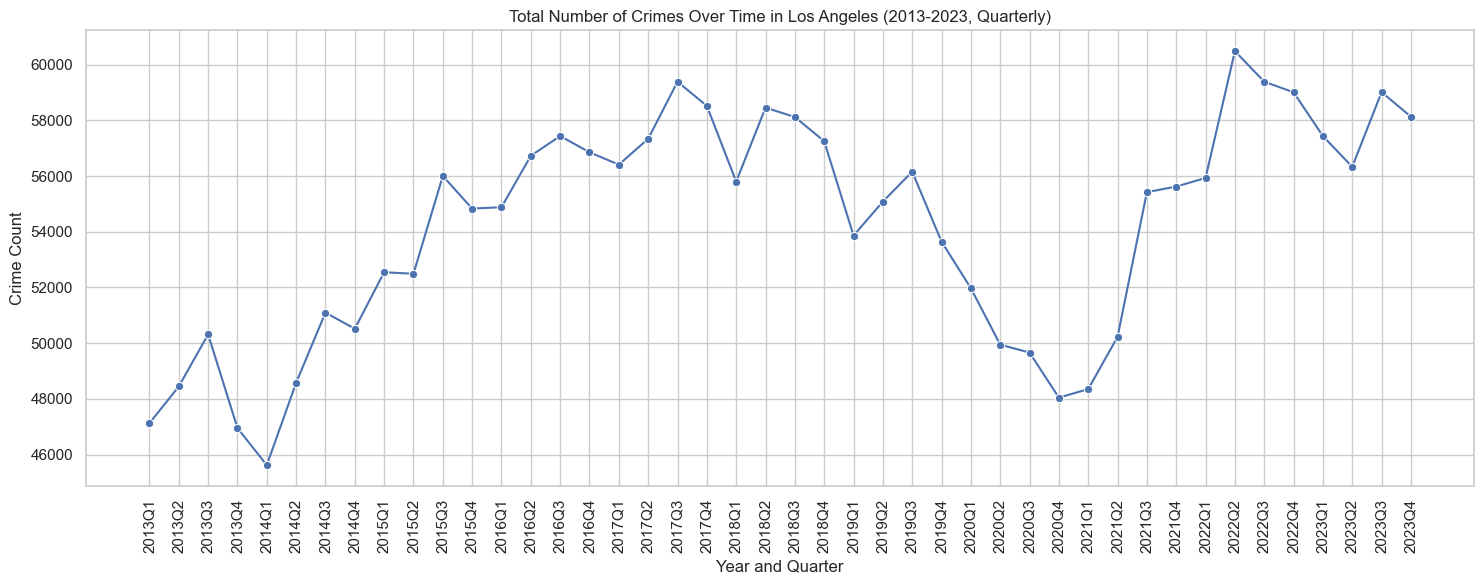

In [43]:
# Load the data
crimes_clean = pd.read_csv('crimes_clean.csv')

# Ensure 'DATE OCC' is a datetime column
crimes_clean['DATE OCC'] = pd.to_datetime(crimes_clean['DATE OCC'])

# Create 'year_month' to represent periods in YYYY-Q format for quarterly data
crimes_clean['year_quarter'] = crimes_clean['DATE OCC'].dt.to_period('Q')

# Group by 'year_quarter' and count the number of crimes in each quarter
crime_over_time = crimes_clean.groupby('year_quarter').size().reset_index(name='Crime Count')

# Since we're now using PeriodIndex, convert 'year_quarter' to string for easy plotting
crime_over_time['year_quarter'] = crime_over_time['year_quarter'].astype(str)

# Filter the DataFrame to include only dates before '2024Q1' (if you want the full data set until the end of 2024, this filter isn't necessary)
crime_over_time = crime_over_time[crime_over_time['year_quarter'] < '2024Q1']

# Visualize the trend of crimes over time
plt.figure(figsize=(15, 6))
sns.lineplot(x='year_quarter', y='Crime Count', data=crime_over_time, marker='o', color='b')
plt.title('Total Number of Crimes Over Time in Los Angeles (2013-2023, Quarterly)')
plt.xlabel('Year and Quarter')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

### Frequency of Top 10 Crime Types by Area in Los Angeles
The heatmap provides a detailed view of how the top 10 crime types are distributed across different areas in Los Angeles. The color intensity indicates the frequency of each crime type within an area, allowing us to quickly identify which crimes are most prevalent in which areas. This kind of visualization can be particularly useful for law enforcement to target specific crime types in areas where they are most common.

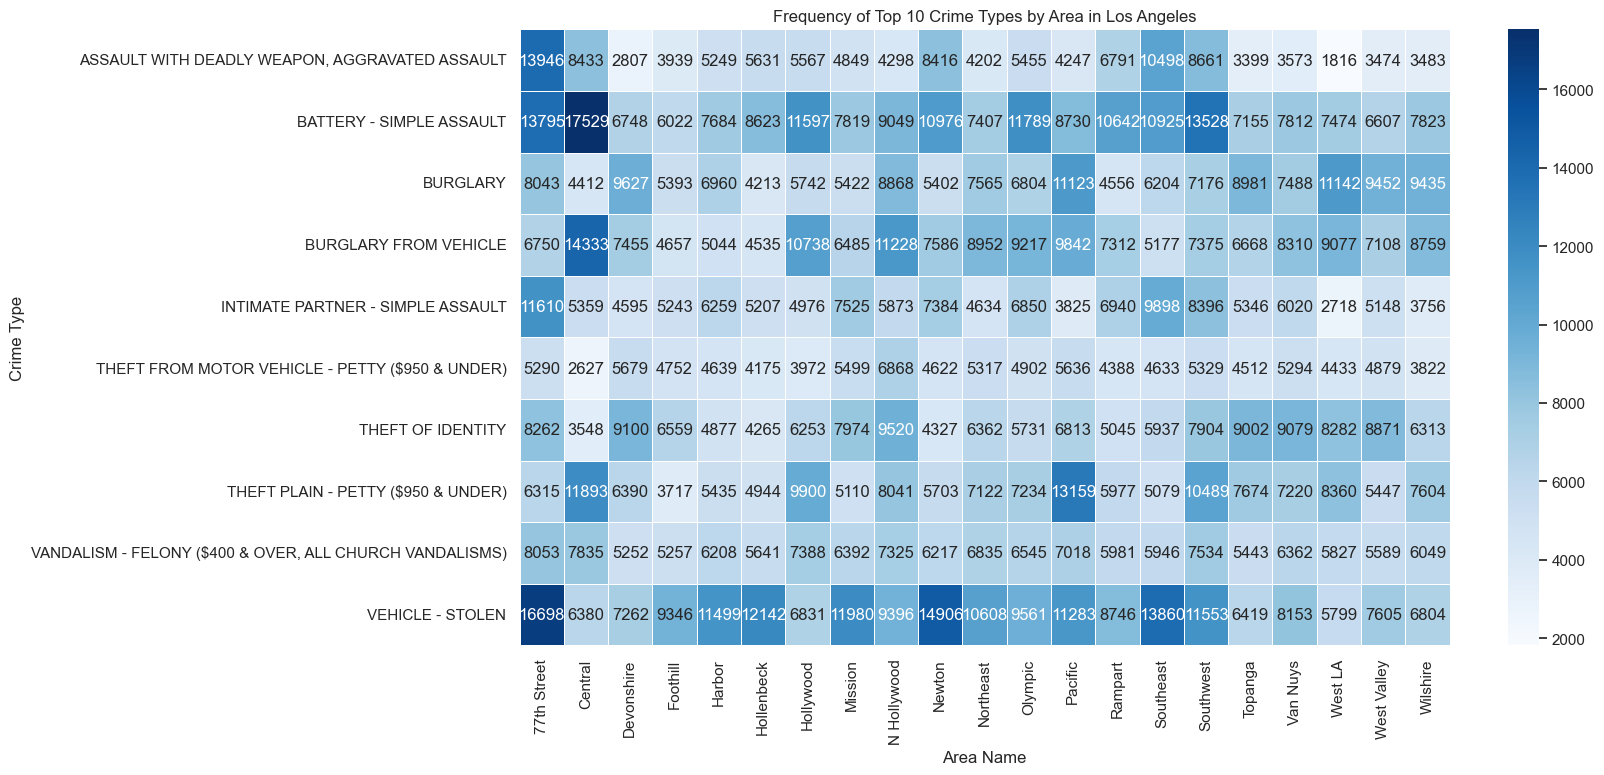

In [44]:
# Group by 'Crm Cd Desc' (crime description) and count the number of each type of crime
crime_type_counts = crimes_clean['Crm Cd Desc'].value_counts().nlargest(10).reset_index()
crime_type_counts.columns = ['Crime Type', 'Count']

# Filter the dataset for the top 10 crime types
top_crimes = crime_type_counts['Crime Type'].tolist()
top_crimes_data = crimes_clean[crimes_clean['Crm Cd Desc'].isin(top_crimes)]

# Create a pivot table for the heatmap
crime_type_area_pivot = top_crimes_data.pivot_table(index='Crm Cd Desc', columns='AREA NAME', aggfunc='size', fill_value=0)

# Adjusting the heatmap with a sequential color palette
plt.figure(figsize=(15, 8))
sns.heatmap(crime_type_area_pivot, annot=True, fmt="d", cmap='Blues', linewidths=.5)
plt.title('Frequency of Top 10 Crime Types by Area in Los Angeles')
plt.xlabel('Area Name')
plt.ylabel('Crime Type')
plt.xticks(rotation=90)
plt.show()

### Top 10 Most Common Crime Types in Los Angeles
This visualization provides a clear picture of which types of crimes are most frequently reported. Understanding the prevalence of different crime types can help in prioritizing and strategizing crime prevention and response efforts.

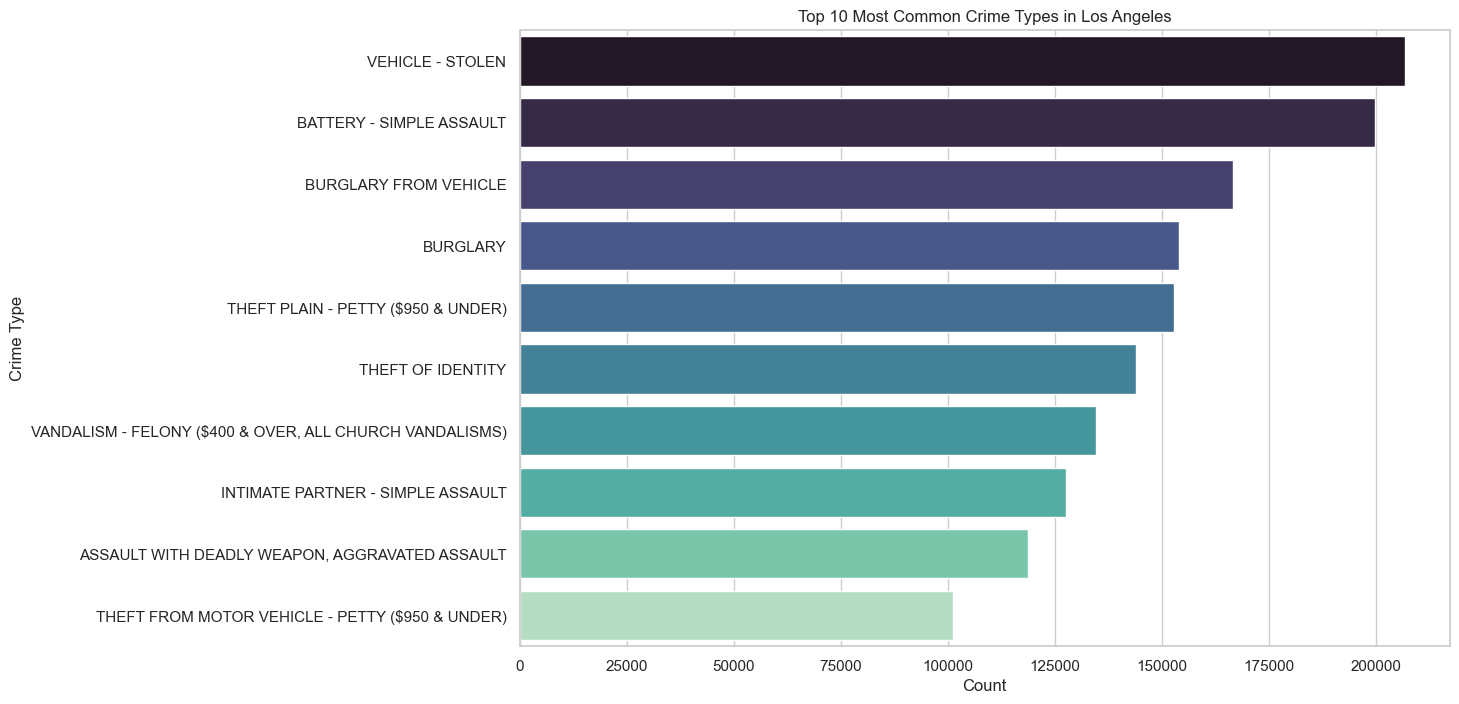

In [45]:
# Let's visualize the most common crime types
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Crime Type', data=crime_type_counts, hue='Crime Type', palette='mako', legend=False)
plt.title('Top 10 Most Common Crime Types in Los Angeles')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

### Trends of Top 10 Crime Types Over Time in Los Angeles
The line plot illustrates the trends of the top 10 crime types over time in Los Angeles. Each line represents the frequency of a specific crime type from month to month. This visualization helps us identify patterns, such as increases or decreases in crime rates, and any seasonal trends or anomalies.

From the plot, we can observe that some crime types show clear trends, while others fluctuate more randomly. This kind of analysis can be particularly insightful for predicting future crime rates and understanding the effectiveness of law enforcement strategies over time.

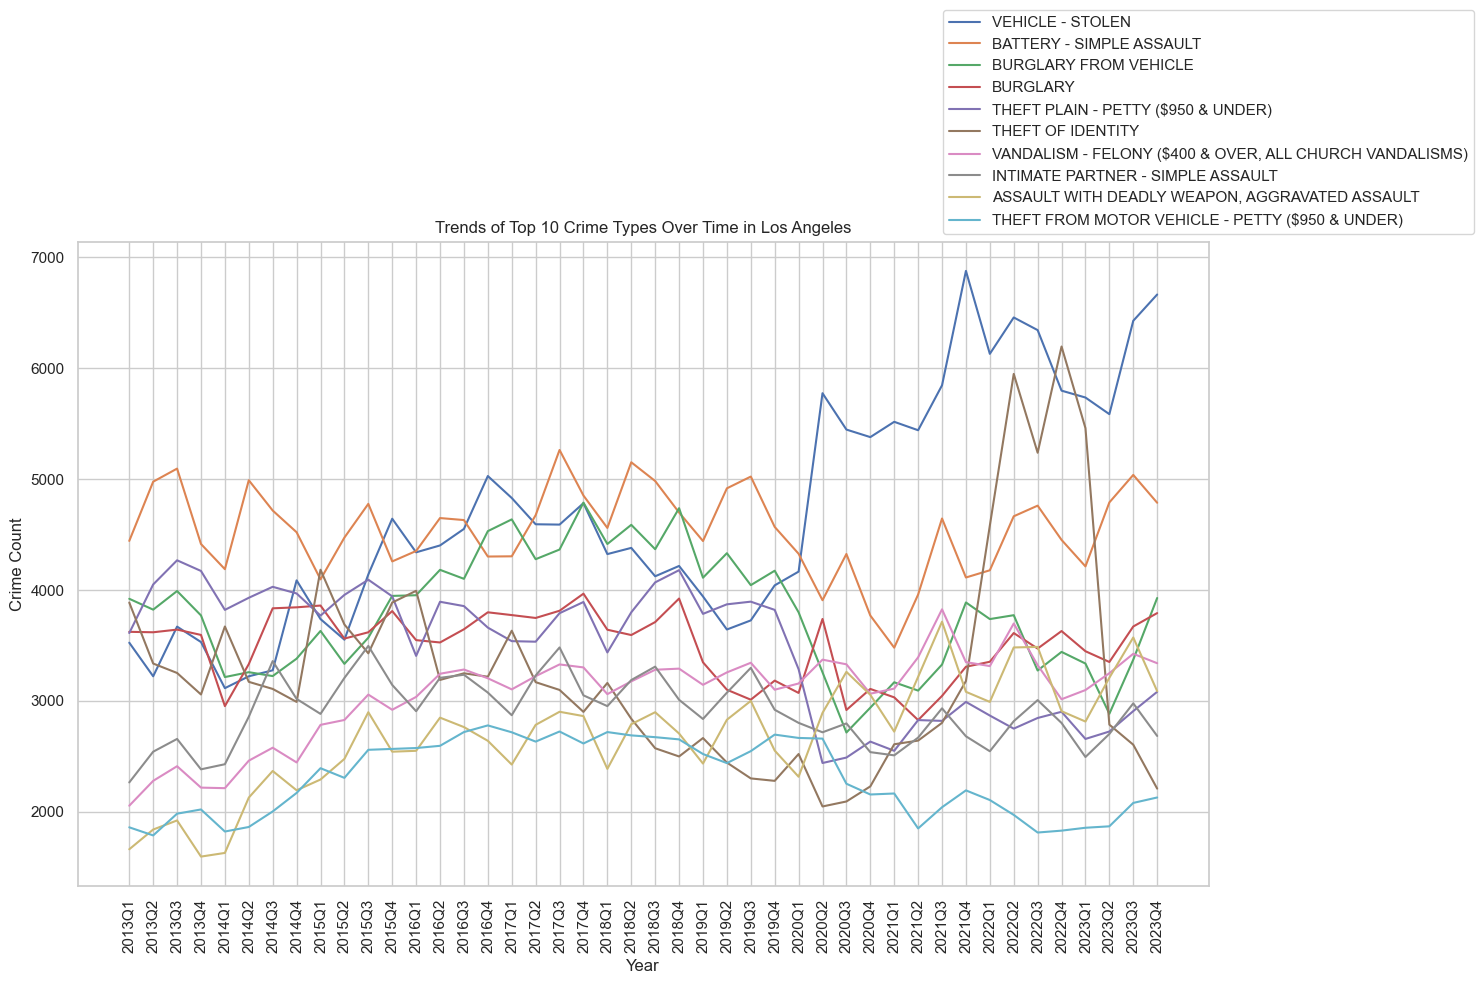

In [46]:
# Create a dataframe for time series analysis of the top crime types
top_crimes_time_data = top_crimes_data.groupby(['year_quarter', 'Crm Cd Desc']).size().unstack(fill_value=0)

q1_2024 = pd.Period('2024Q1')

# Filter the DataFrame to include only dates before '2024Q1'
top_crimes_time_data = top_crimes_time_data[top_crimes_time_data.index < q1_2024]

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for crime in top_crimes:
    sns.lineplot(x=top_crimes_time_data.index.astype(str), y=top_crimes_time_data[crime], label=crime)

plt.title('Trends of Top 10 Crime Types Over Time in Los Angeles')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(1,1)) 
plt.tight_layout()  
plt.show()

### Number of Crimes by Victim's Sex and Age Category
This bar chart depicts the "Number of Crimes by Victim's Sex & Age Category." Here's a breakdown of the observed trends:
- Child: Female children (F) are victimized less frequently than male children (M). There's an almost negligible representation for 'X' (which could possibly denote 'Other' or 'Not Specified') in this age group.
- Teen: Male teenagers appear to be the primary targets, with their count being significantly higher than that of female teenagers. Once again, 'X' is minimally represented.
- Young Adult: Young adult females face slightly more crimes than young adult males, but the numbers are quite close. The 'X' category sees a small increase but remains comparatively low.
- Adult: Adult males are more often victims of crimes compared to adult females. The 'X' category remains minimal but slightly more than the previous age groups.
- Senior: Female seniors are victimized less frequently than male seniors. The 'X' category remains relatively low in this age bracket.
- Overall: Males are more frequently victims in the "Child", "Teen", and "Adult" categories. Whilst, Females surpass males in the "Young Adult" category but are less victimized in the other age groups. And the 'X' category which stands for “Unknown” consistently has the least number of crimes across all age groups but sees slight increases as the age group progresses.
- In essence, the distribution of crimes varies based on both gender and age. While males in certain age groups face more crimes, young adult females seem to be an exception. 


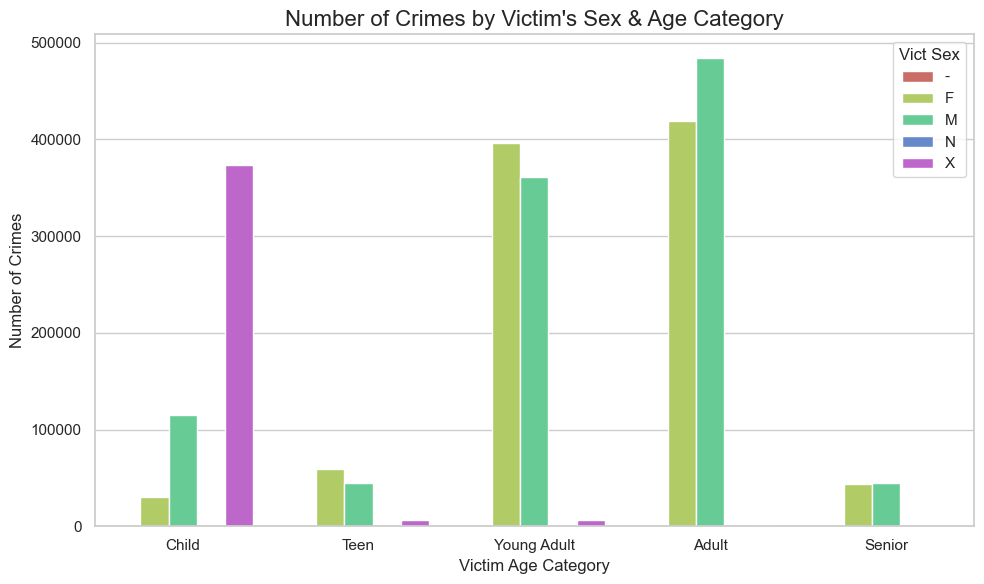

In [47]:
# Setting the figure size for better visualization
plt.figure(figsize=(10, 6))

# Countplot to visualize the distribution of crimes by victim age category
sns.countplot(data=crimes_filtered, x='Vict_age_cat', order=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'], hue='Vict Sex', palette= 'hls')
plt.title("Number of Crimes by Victim's Sex & Age Category", fontsize=16)
plt.ylabel('Number of Crimes')
plt.xlabel('Victim Age Category')

plt.tight_layout()
#plt.savefig('Crimes by Sex & Age.jpg', bbox_inches='tight')
plt.show()

### Mapping Crimes by Area in Los Angeles
This map showcases the number of crimes by area. "Central" has the highest crime count, noticeably exceeding 25,000. "77th Street" and "Pacific" follow, with numbers slightly above 20,000. Most areas, like "Southwest", "Hollywood", and "Southeast", have crime counts clustered around 15,000 to 20,000. The areas from "Wilshire" to "Topanga" exhibit more uniformity, with counts close to 15,000. "Hollenbeck" and "Foothill" at the end have noticeably lower crime rates, below 10,000. In summary, while "Central" stands out with the highest crime incidents, there's a general decrease as we move rightwards, with a few areas showing significant deviations.

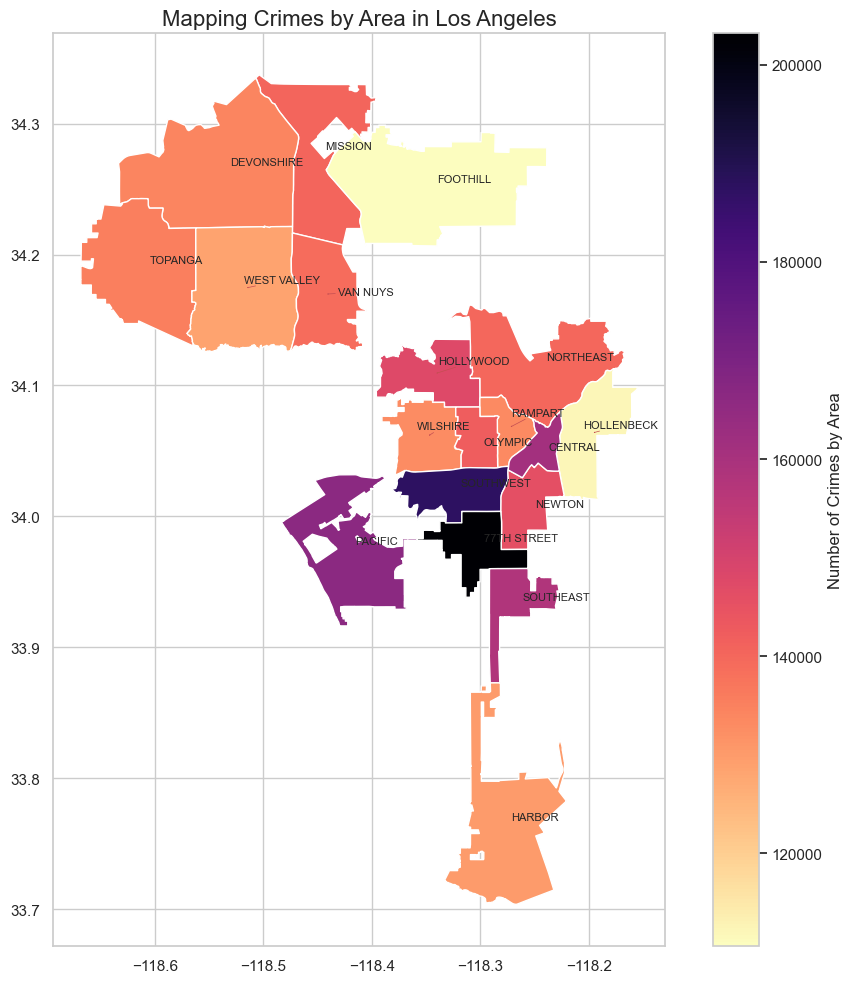

In [48]:
# Load the GeoJSON data into a GeoDataFrame
url = "https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LAPD_Division/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
gdf = gpd.read_file(url)

# Aggregate number of crimes by area
crime_counts = crimes.groupby('AREA NAME', observed=True).size().reset_index(name='crime_count')
# Convert 'AREA NAME' to uppercase to match 'APREC'
crime_counts['AREA NAME'] = crime_counts['AREA NAME'].str.upper()

# Merge the GeoDataFrame with crime counts
gdf_merged = gdf.merge(crime_counts, left_on='APREC', right_on='AREA NAME')

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')  # Setting aspect ratio

gdf_merged.plot(column='crime_count', ax=ax, legend=True, cmap='magma_r',
                legend_kwds={'label': "Number of Crimes by Area"})

# Instead of annotating directly, gather all texts in a list
texts = []
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged['APREC']):
    texts.append(ax.text(x, y, label, fontsize=8))

# Use adjust_text to optimize text positions
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.title('Mapping Crimes by Area in Los Angeles', fontsize=16)
plt.tight_layout()
#plt.savefig('Mapping Crimes by Area.jpg', bbox_inches='tight')
plt.show()

### Number of Crimes by Day of the Week
The chart shows the "Number of Crimes by Day of the Week." Crimes are fairly consistent daily, with slight peaks on Saturday and a modest dip on Sunday. This uniformity suggests crimes occur regularly, irrespective of the day. Further investigation might reveal factors influencing this near-even distribution.

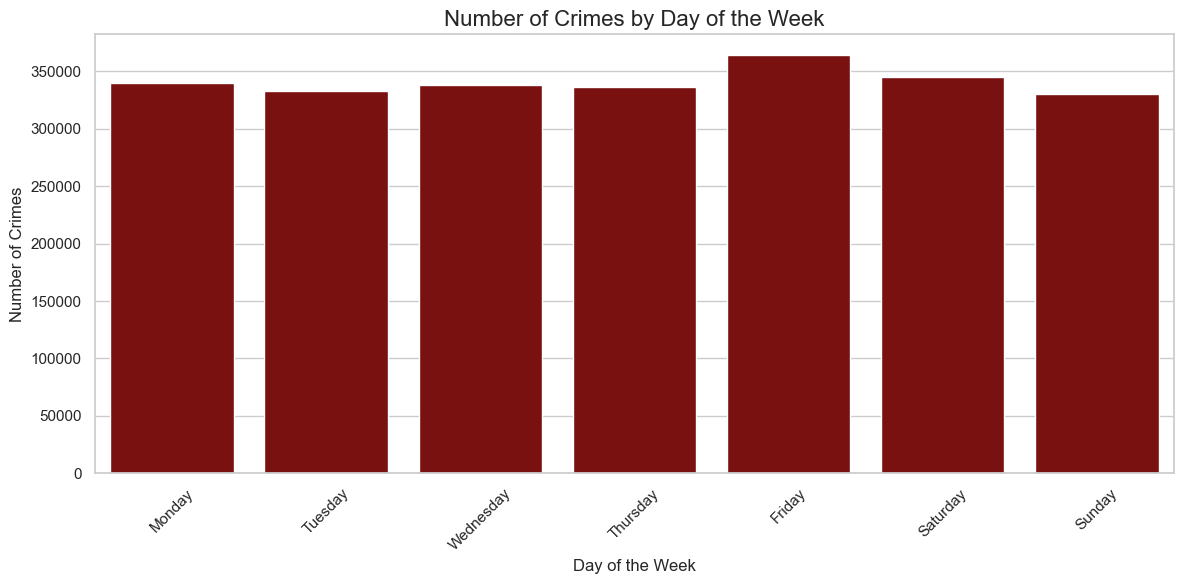

In [49]:
# Group by the day of the week and count the number of crimes
weekday_counts = crimes_filtered.groupby('weekday_name').size().reset_index(name='crime_count')

# Order the days for proper plotting
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.set_index('weekday_name').loc[order].reset_index()

# Visualize using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_name', y='crime_count', data=weekday_counts, color= 'darkred', order= order)
plt.title('Number of Crimes by Day of the Week', fontsize=16)
plt.ylabel('Number of Crimes')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('Crimes by Day.jpg', bbox_inches='tight')
plt.show()

### Distribution of Crimes by Hour of the Day
The chart depicts "Distribution of Crimes by Hour of the Day." Crime occurrences dip in the early hours, rise steadily through the morning, peak around midday, then maintain a high plateau in the afternoon and evening. 

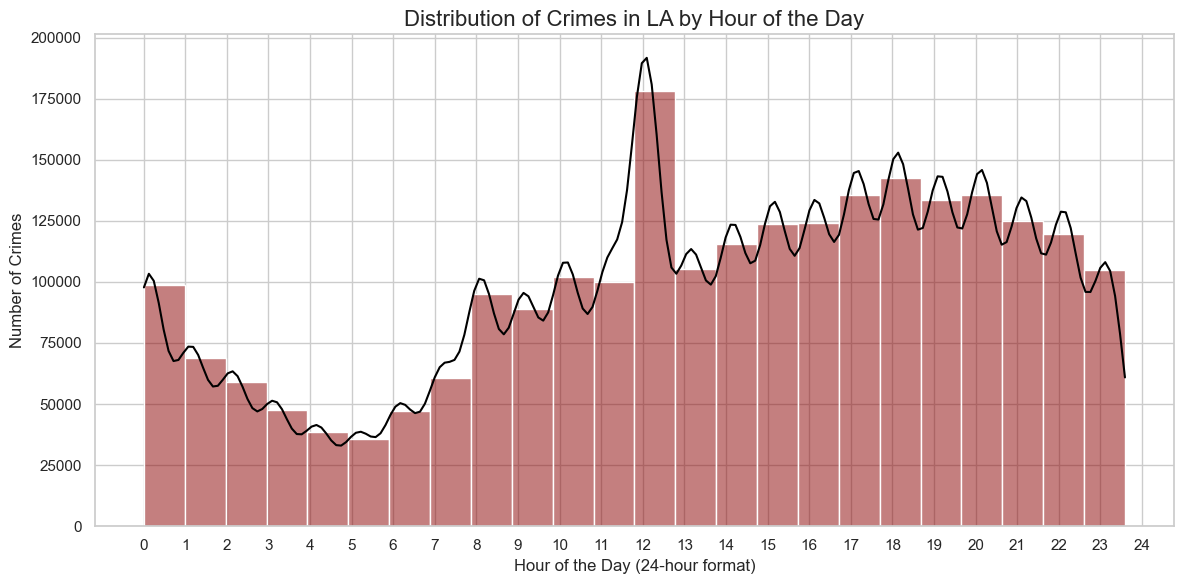

In [50]:
plt.figure(figsize=(12, 6))

# Extracting the hour from the 'TIME OCC' column
crimes_filtered['hour'] = crimes_filtered['TIME OCC'] / 100

# Plotting the histogram
sns.histplot(crimes_filtered['hour'], bins=24, kde=True, color='darkred').lines[0].set_color('black')

plt.title('Distribution of Crimes in LA by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(range(0, 25))
plt.tight_layout()
#plt.savefig('Crimes by Hour.jpg', bbox_inches='tight')
plt.show()